In [396]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [397]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [398]:
df = pd.read_csv("CitieSHealth_BCN_DATA_PanelStudy_20220414.csv")

In [399]:
rename_map = {
'bienestar': 'wellbeing',
'energia': 'energy',
'estres': 'stress',
'sueno': 'sleep_quality',
'horasfuera': 'hours_outdoors',
'actividadfisica': 'physical_activity',
'ordenador': 'computer_use',
'dieta': 'diet',
'alcohol': 'alcohol_use',
'drogas': 'drug_use',
'bebida': 'sugary_drinks',
'otrofactor': 'other_fators',
'enfermo': 'illness_status'
}


df = df.rename(columns=rename_map)

In [400]:
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 95 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID_Zenodo                        3348 non-null   int64  
 1   date_all                         3348 non-null   int64  
 2   year                             3348 non-null   int64  
 3   month                            3348 non-null   int64  
 4   day                              3348 non-null   int64  
 5   dayoftheweek                     3348 non-null   int64  
 6   hour                             3348 non-null   int64  
 7   mentalhealth_survey              3348 non-null   object 
 8   occurrence_mental                3280 non-null   float64
 9   wellbeing                        3273 non-null   float64
 10  energy                           3207 non-null   float64
 11  stress                           3173 non-null   float64
 12  sleep_quality       

In [401]:
df.head()

,ID_Zenodo,date_all,year,month,day,dayoftheweek,hour,mentalhealth_survey,occurrence_mental,wellbeing,energy,stress,sleep_quality,hours_outdoors,physical_activity,computer_use,diet,alcohol_use,drug_use,sugary_drinks,illness_status,other_fators,stroop_test,occurrence_stroop,mean_incongruent,correct,response_duration_ms,performance,mean_congruent,inhib_control,z_performance,z_mean_incongruent,z_inhib_control,no2bcn_24h,no2bcn_12h,no2gps_24h,no2gps_12h,no2bcn_12h_x30,no2bcn_24h_x30,no2gps_12h_x30,no2gps_24h_x30,min_gps,hour_gps,pm25bcn,BCμg,sec_noise55_day,sec_noise65_day,sec_greenblue_day,hours_noise_55_day,hours_noise_65_day,hours_greenblue_day,tmean_24h,tmean_12h,humi_24h,humi_12h,pressure_24h,pressure_12h,precip_24h,precip_12h,precip_12h_binary,precip_24h_binary,maxwindspeed_24h,maxwindspeed_12h,noise_total_LDEN_55,access_greenbluespaces_300mbuff,µgm3,incidence_cat,start_day,start_month,start_year,start_hour,end_day,end_month,end_year,end_hour,Totaltime,Totaltime_estimated,Houron,Houroff,age_yrs,yearbirth,smoke,psycho,gender,district,education,covid_work,covid_mood,covid_sleep,covid_espacios,covid_aire,covid_motor,covid_electric,covid_bikewalk,covid_public_trans
0,71,22190,2020,10,2,4,18,Yes,1.0,9.0,9.0,1.0,10.0,7.0,Yes,No,Yes,No,No,Yes,No,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.910714,35.666667,19.826168,23.612868,1.188889,0.830357,0.660872,0.660872,135.0,2.250000,9.883333,0.839338,6602.0,0.0,6907.0,1.833889,0.0,1.918611,18.870833,17.900000,72.333333,70.375000,991.779167,987.416667,1.3,1.3,1,1,0.4,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.0,1971.0,Yes,No,Mujer,Horta-Guinardo,Universitario,Ha empeorado mucho,Ha empeorado mucho,Ha empeorado un poco,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo igual que antes
1,112,22202,2020,10,14,2,22,Yes,2.0,8.0,9.0,5.0,8.0,5.0,Yes,Yes,Yes,No,No,Yes,No,No,Yes,2.0,1170.9375,16.0,18735.0,51.240993,1119.375,51.5625,0.817020,-0.707942,-0.031229,28.544444,22.686111,23.426426,24.486559,0.756204,0.951481,0.780881,0.780881,5.0,0.083333,8.160000,0.500946,NaN,NaN,NaN,NaN,NaN,NaN,15.445833,15.608333,61.479167,52.333333,1005.495833,1005.141667,4.8,0.0,0,1,2.5,0.0,0.0,Yes,19.66,Mobility incidence,13.0,10.0,2020.0,8.0,19.0,10.0,2020.0,18.0,154.00,No,08:30:00,18:30:00,37.0,1983.0,No,No,Mujer,Gràcia,Universitario,Ha empeorado mucho,Ha empeorado un poco,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,NaN,Lo utilizo más que antes,Lo utilizo menos que antes
2,110,22217,2020,10,29,3,18,Yes,10.0,9.0,5.0,8.0,9.0,8.0,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,10.0,1071.3125,16.0,17141.0,56.006067,1025.875,45.4375,0.541222,-0.550170,-0.197332,44.511905,41.023810,45.321167,46.942627,1.367460,1.483730,1.510706,1.510706,0.0,0.000000,13.383333,1.507505,NaN,NaN,NaN,NaN,NaN,NaN,17.700000,19.341667,69.604167,68.291667,1020.725000,1021.525000,0.0,0.0,0,0,0.0,0.0,1.0,Yes,28.48,Physical incidence,13.0,10.0,2020.0,10.0,19.0,10.0,2020.0,19.0,153.17,No,10:05:00,19:15:00,28.0,1992.0,Yes,No,Mujer,Eixample,Universitario,Ha empeorado mucho,No ha cambiado,No ha cambiado,Le doy más importancia que antes,Le doy más importancia que antes,Lo utilizo igual que antes,Lo utilizo más que antes,Lo utilizo más que antes,Lo utilizo menos que antes
3,115,22222,2020,11,3,1,18,Yes,14.0,3.0,2.0,5.0,2.0,5.0,No,Yes,Yes,No,No,Yes,No,Yes,Yes,14.0,966.8750,15.0,15470.0,58.177117,942.000,24.8750,0.749152,-1.103400,0.008801,33.812500,33.666667,24.328357,22.667779,1.122222,1.127083,0.810945,0.810945,10.0,0.166667,16.533333,1.167061,0.0,0.0,0.0,0.000000,0.0,0.000000,18.054167,18.258333,82.979167,78.208333,1020.179167,1020.983333,0.0,0.0,0,0,0.0,0.0,1.0,Yes,15.72,No incidence,13.0,10.0,2020.0,11.0,20.0,10.0,2020.0,11.0,168.00,No,11:30:00,11:30:00,29.0,1991.0,No,No,Mujer,Sant Martí,Universitario,Ha empeorado mucho,Ha empeorado un poco,Ha empeorado un poco,Le do

In [402]:
df['year'].describe()


count    3348.000000
mean     2020.064815
std         0.246236
min      2020.000000
25%      2020.000000
50%      2020.000000
75%      2020.000000
max      2021.000000
Name: year, dtype: float64

In [403]:
df = df.drop(columns=['no2bcn_12h_x30', 'no2bcn_24h_x30', 'no2gps_12h_x30', 'no2gps_24h_x30', 'precip_12h_binary', 'precip_24h_binary'])  



Those columns kind of repeat some other columns.

In [404]:
df['stroop_test'].describe()
df = df.drop(columns = ['stroop_test', 'occurrence_stroop', 'correct'])


In [406]:
df = df.drop(columns=['covid_work', 'covid_mood', 'covid_sleep', 'covid_espacios', 'covid_aire', 'covid_motor', 'covid_electric', 'covid_bikewalk',	'covid_public_trans'])


I have deleted these columns because I dont understand spanish :D

In [407]:
df['Totaltime_estimated'].describe()

count     3018
unique       2
top         No
freq      2426
Name: Totaltime_estimated, dtype: object

In [408]:
df['mentalhealth_survey'].describe()

count     3348
unique       2
top        Yes
freq      3335
Name: mentalhealth_survey, dtype: object

These statistics showed that the columns are not very informative, so I can drop them.

In [ ]:
df = df.drop(columns=['date_all', 'year', 'day', 'hour', 'start_day', 'start_month', 'start_year',	'start_hour', 'end_day', 'end_month', 'end_year', 'end_hour', 'Totaltime','Totaltime_estimated'])
#survey useless data



In [ ]:
df = df.drop(columns=['no2bcn_12h','no2gps_12h', 'tmean_12h', 'humi_12h', 'pressure_12h', 'precip_12h', 'maxwindspeed_12h'])
#enviromental repeated data


In [411]:
df = df.drop(columns=['Houron', 'Houroff', 'yearbirth'])

In [413]:
df = df.drop(columns=['sec_noise55_day', 'sec_noise65_day', 'sec_greenblue_day', 'incidence_cat'])

In [414]:

value_counts = df['gender'].value_counts()
print(value_counts)


gender
Mujer     2363
Hombre     970
Otra         5
Name: count, dtype: int64


In [415]:

df['gender'] = df['gender'].replace({
    'Mujer': 'Female',
    'Hombre': 'Male'
})
df = df[df['gender'].isin(['Male', 'Female'])]

# Check result
print(df['gender'].value_counts())



gender
Female    2363
Male       970
Name: count, dtype: int64


Here, I just grouped similiar data, to make it easy for myself :D

In [416]:
menal_health = ['wellbeing', 'energy', 'stress', 'sleep_quality'] #the effect 
lifestyle = ['physical_activity', 'computer_use', 'diet',\
             'alcohol_use', 'drug_use', 'sugary_drinks','illness_status'] #confounders

environment = ['no2bcn_24h', 'no2gps_24h', 'pm25bcn',	'BCμg'] #independent variables
green_blue = ['hours_greenblue_day', 'access_greenbluespaces_300mbuff']
noise = ['hours_noise_55_day', 'hours_noise_65_day', 'noise_total_LDEN_55'] 
weather = ['tmean_24h', 'humi_24h',	'pressure_24h', 'precip_24h', 'maxwindspeed_24h'] #cofounders
cognition = ['mean_incongruent', 'response_duration_ms', 'performance', 'mean_congruent', 'inhib_control',	'z_performance', 'z_mean_incongruent', 'z_inhib_control']

In [417]:
df['mentalhealth_survey'].describe()

count     3333
unique       2
top        Yes
freq      3320
Name: mentalhealth_survey, dtype: object

In [418]:
df['psycho'].describe()
df = df.drop(columns=['psycho','mentalhealth_survey', 'hour_gps', 'min_gps' ])

In [419]:
df['hours_greenblue_day'].describe()

count    2843.000000
mean        1.536169
std         3.610634
min         0.000000
25%         0.000000
50%         0.019444
75%         0.776389
max        21.574444
Name: hours_greenblue_day, dtype: float64

In [420]:
df['pm25bcn'] = (
    df.groupby('month')['pm25bcn']
      .transform(lambda x: x.fillna(x.median()))
)
df['no2bcn_24h'] = (
    df.groupby('district')['no2bcn_24h']
      .transform(lambda x: x.fillna(x.median()))
)


In [421]:
env_vars = environment + noise + weather

for col in env_vars:

    # 1) District × Month median (only if data exists)
    df[col] = df.groupby(['district', 'month'])[col].transform(
        lambda x: x.fillna(x.median()) if x.notna().any() else x
    )

    # 2) District median fallback
    df[col] = df.groupby('district')[col].transform(
        lambda x: x.fillna(x.median()) if x.notna().any() else x
    )

    # 3) Global median fallback (always safe)
    df[col] = df[col].fillna(df[col].median())



These missing values I filled step by step based on district and month.

In [ ]:
df[env_vars].isna().sum()
#just checking

no2bcn_24h             0
no2gps_24h             0
pm25bcn                0
BCμg                   0
hours_noise_55_day     0
hours_noise_65_day     0
noise_total_LDEN_55    0
tmean_24h              0
humi_24h               0
pressure_24h           0
precip_24h             0
maxwindspeed_24h       0
dtype: int64

In [423]:
cat_vars = lifestyle + ['education', 'smoke']

for col in cat_vars:
    df[col] = df[col].fillna('Unknown')


In [424]:
df['age_yrs'] = df['age_yrs'].fillna(df['age_yrs'].median())


In [425]:

missing_counts = df.isna().sum().sort_values(ascending=False)
percentage_missing = (missing_counts / len(df)) * 100

summary = pd.DataFrame({
    "missing_count": missing_counts,
    "percentage_missing": percentage_missing
})

print(summary)

                                 missing_count  percentage_missing
hours_greenblue_day                        490           14.701470
µgm3                                       330            9.900990
mean_congruent                             302            9.060906
performance                                302            9.060906
z_inhib_control                            302            9.060906
mean_incongruent                           302            9.060906
response_duration_ms                       302            9.060906
z_mean_incongruent                         302            9.060906
z_performance                              302            9.060906
inhib_control                              302            9.060906
access_greenbluespaces_300mbuff            300            9.000900
stress                                     175            5.250525
district                                   165            4.950495
sleep_quality                              158            4.74

There are some missing data, that I can not fill, because they are showing results od test.

In [ ]:

missing = df.isna().mean().sort_values(ascending=False)
missing = missing[missing > 0]

# Droped rows with missing key wellbeing outcomes
df = df.dropna(subset=['wellbeing', 'sleep_quality', 'stress'])


So, let's consider mental health distributions based on survey

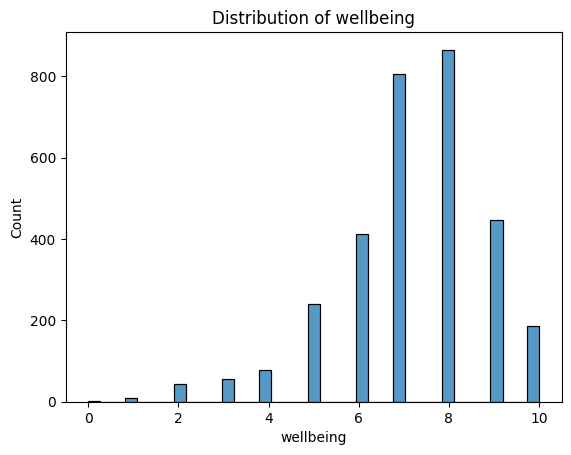

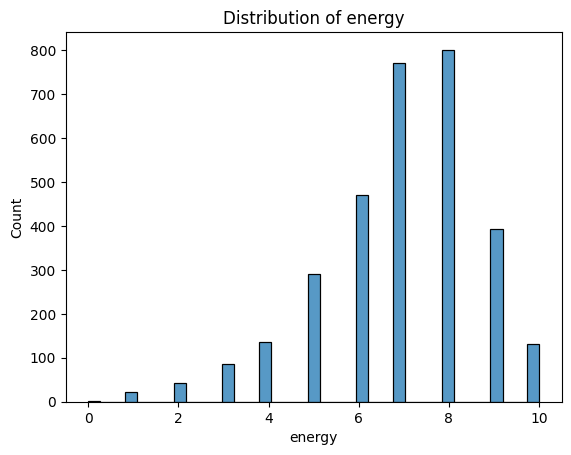

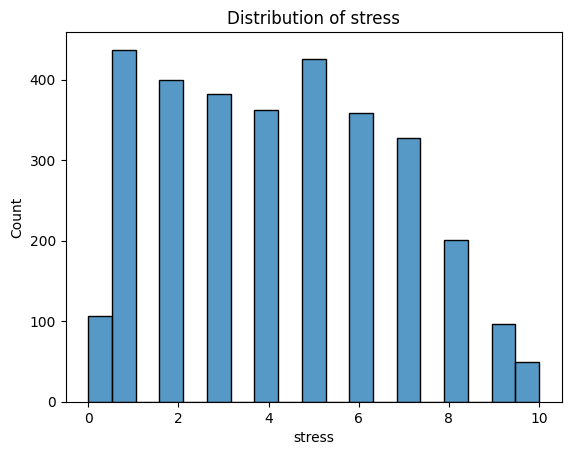

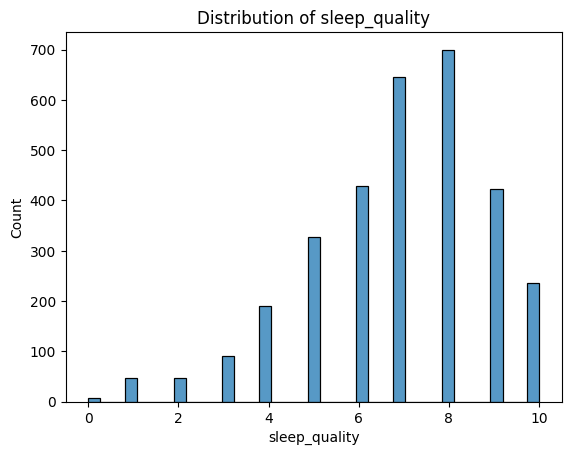

In [427]:

mental_health = ['wellbeing', 'energy', 'stress', 'sleep_quality']
for var in mental_health:
    if var in df.columns:
        sns.histplot(df[var])
        plt.title(f"Distribution of {var}")
        plt.show()


These results show us, that stress scores varied widely across participants, showing large differences between individuals. In contrast, wellbeing, energy, sleep quality scores were mostly high, with fewer participants reporting low scores. This suggests that stress may be more responsive to short-term environmental factor.

As a next step, I analyzed stress levels by age and gender to explore whether these demographic factors were associated with differences in stress.

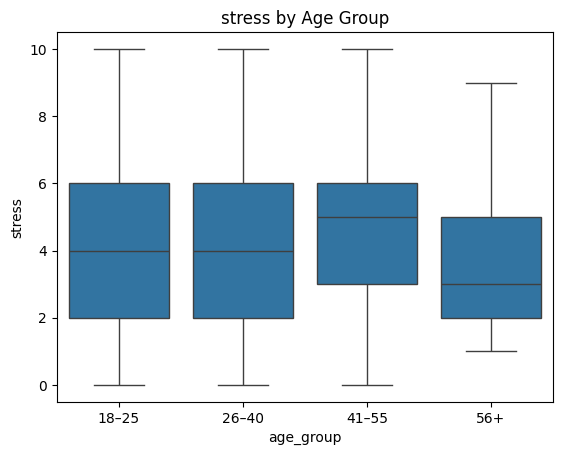

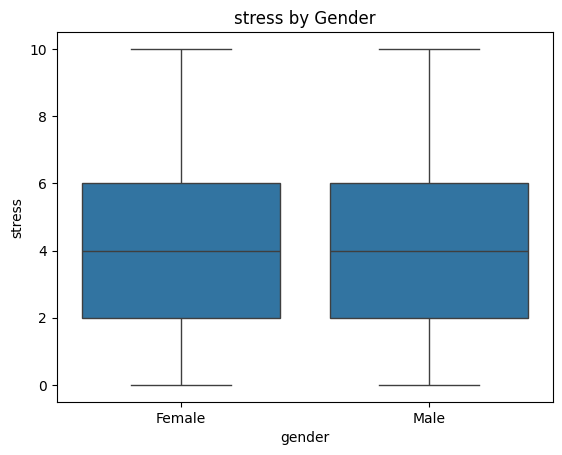

In [428]:
# Age groups
df['age_group'] = pd.cut(
    df['age_yrs'],
    bins=[0, 25, 40, 55, 80],
    labels=['18–25', '26–40', '41–55', '56+']
)

# Wellbeing by age
sns.boxplot(x='age_group', y='stress', data=df)
plt.title("stress by Age Group")
plt.show()

# Wellbeing by gender
sns.boxplot(x='gender', y='stress', data=df)
plt.title("stress by Gender")
plt.show()

These boxplots indicate that stress levels do not differ significantly by gender. However, individuals aged 41–55 tend to have slightly higher stress levels compared to other age groups.

Since the previous groups were not very informative, I created a correlation heatmap based on lifestyle and environmental factors to uncover more meaningful patterns

In [429]:
outcomes = ['wellbeing', 'stress', 'sleep_quality']
vars_of_interest = lifestyle + environment + outcomes
df_subset = df[vars_of_interest].copy()


In [430]:
binary_map = {'Yes': 1, 'No': 0}

binary_vars = ['physical_activity', 'computer_use', 'diet',\
             'alcohol_use', 'drug_use', 'sugary_drinks','illness_status']

for var in binary_vars:
    if var in df_subset.columns:
        df_subset[var] = df_subset[var].map(binary_map)

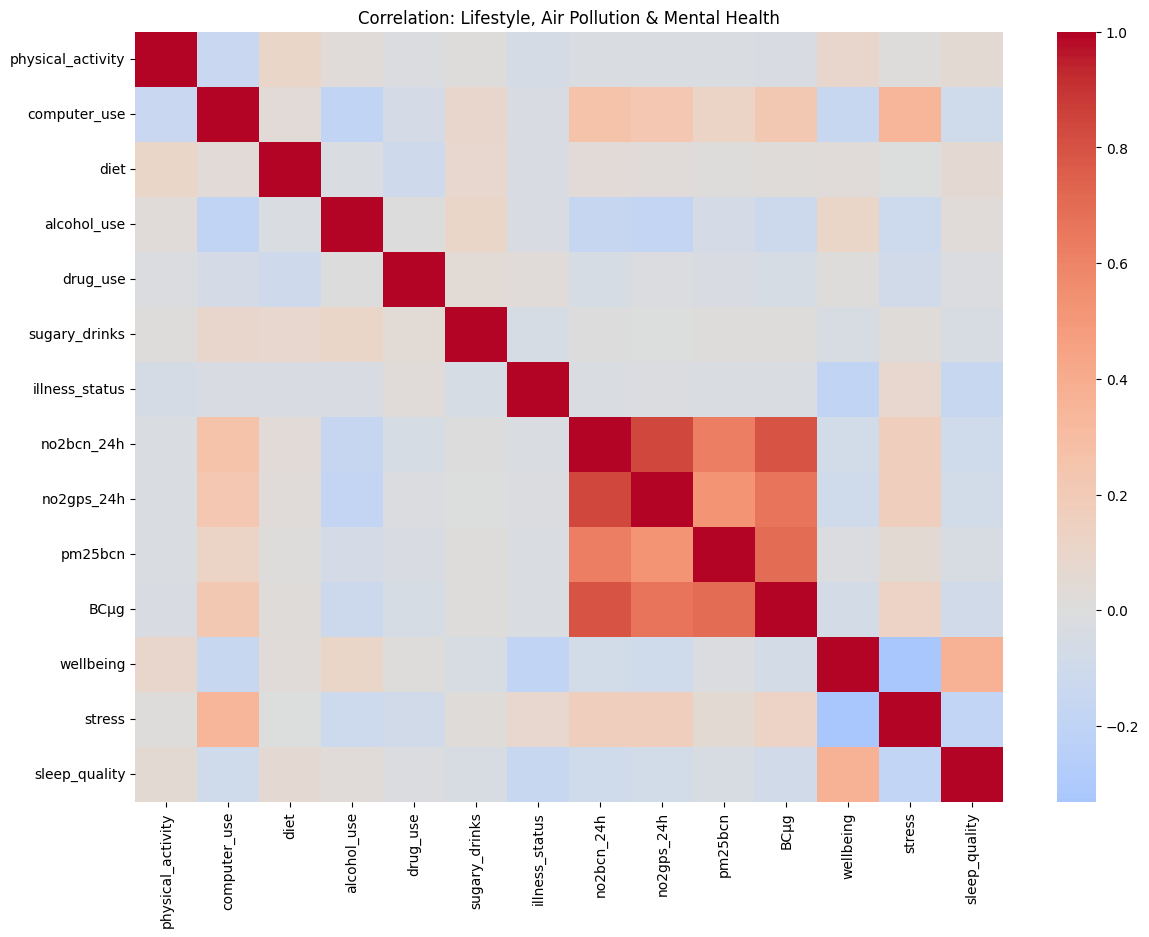

In [431]:
corr = df_subset.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation: Lifestyle, Air Pollution & Mental Health")
plt.show()


The correlation heatmap did not show any strong patterns. However, there is a slight positive correlation between stress levels and NO₂ exposure. So, as a nest step, I examined the distribution of environmental data.

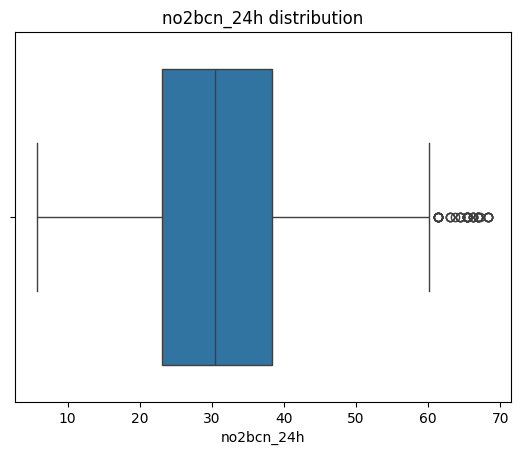

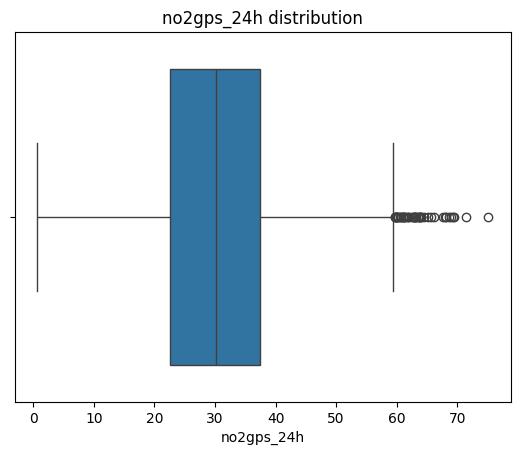

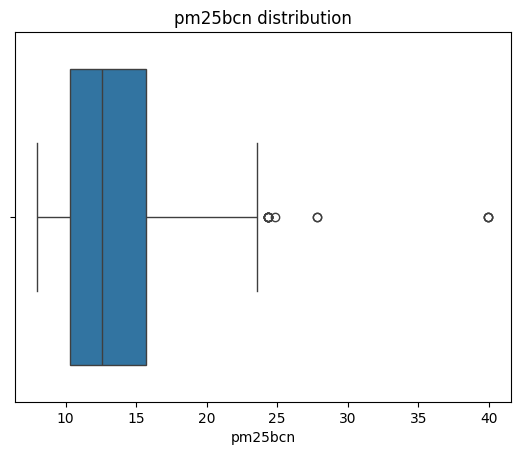

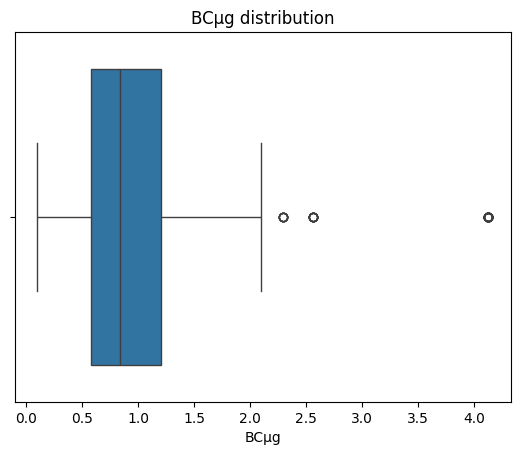

In [432]:
# Boxplots
for var in environment:
    sns.boxplot(x=df[var])
    plt.title(f"{var} distribution")
    plt.show()


The NO_2 distribution boxplot indicates that there are some unusually high values, suggesting the presence of outliers.

In [433]:
#finding outliers
column = 'no2gps_24h' 
Q1 = df[column].quantile(0.25)
Q3 = df[column].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
print("count of outliers =" , len(outliers))
df_outliered = df[(df[column] <= lower_bound) | (df[column] >= upper_bound)]

count of outliers = 45


Since only 45 rows are small compared to the total of ~3,000 rows, analyzing outliers may not be very meaningful. Therefore, I have focused on examining NO₂ levels that exceed the EU air quality standard

In [434]:

air_quality_threshold = 40
df['high_pollution'] = df['no2gps_24h'] >= air_quality_threshold
df['high_pollution'].value_counts()


high_pollution
False    2518
True      627
Name: count, dtype: int64

As I used gps data for NO_2 level, on the next step I grouped the data by districts, to find some information.

In [436]:
mental_vars = ['wellbeing', 'stress', 'sleep_quality']

district_mental = (
    df.groupby(['district', 'high_pollution'])[mental_vars]
    .mean()
)

district_mental


wellbeing    stress  sleep_quality
district            high_pollution                                    
16                  False            7.769231  4.269231       6.538462
                    True             8.153846  3.384615       7.230769
Ciutat Vella        False            7.585635  4.491713       7.657459
                    True             7.142857  5.119048       6.666667
Eixample            False            6.976019  4.170264       6.889688
                    True             6.857143  4.795031       6.844720
Gràcia              False            7.360202  4.128463       6.987406
                    True             6.935065  5.038961       6.584416
Horta-Guinardo      False            6.968153  4.407643       6.636943
                    True             6.741935  5.935484       6.032258
Les Corts           False            7.843137  2.960784       7.294118
                    True             7.300000  3.600000       7.300000
Nou Barris          False            6.595238  5.166667       6.476190
                    True             6.400000  5.000000       6.800000
Sant Andreu         False            7.602410  3.885542       7.716867
                    True             7.272727  4.218182       7.454545
Sant Martí          False            7.196464  4.000000       6.809430
                    True             7.021583  4.683453       6.496403
Sants-Montjuïc      False            7.178404  4.389671       6.610329
                    True             6.970588  4.176471       6.205882
Sarria Sant-Gervasi False            7.543624  3.744966       6.879195
                    True             7.437500  4.250000       7.375000

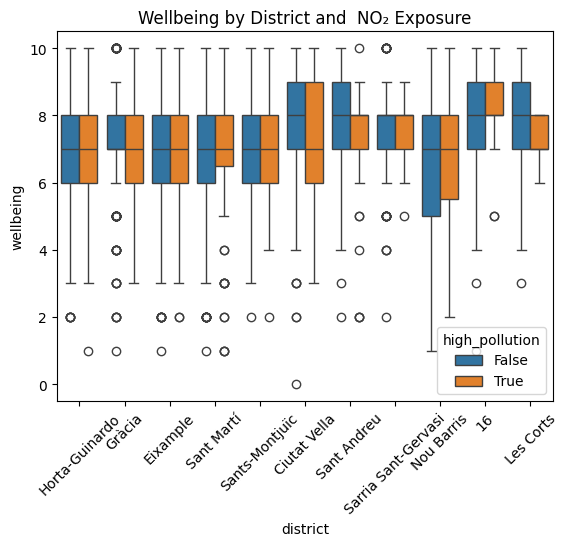

In [437]:
sns.boxplot(
    data=df,
    x='district',
    y='wellbeing',
    hue='high_pollution'
)
plt.title("Wellbeing by District and  NO₂ Exposure")
plt.xticks(rotation=45)
plt.show()


One more time, I checked how wellbeing data is distributed. And this boxplots showed, that there is not much difference on average

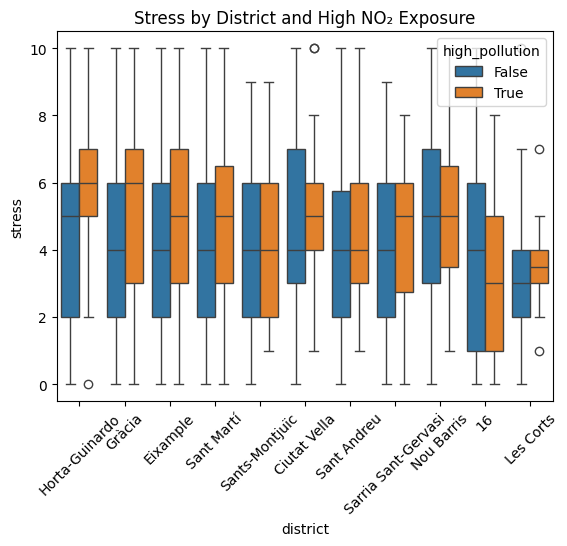

In [438]:
sns.boxplot(
    data=df,
    x='district',
    y='stress',
    hue='high_pollution'
)
plt.title("Stress by District and High NO₂ Exposure")
plt.xticks(rotation=45)
plt.show()

Blue represents people in areas with low NO_2 exposure.T Orange Represents people in areas with high NO_2 exposure.
This result shows, that people in highly exposed areas have higher stress level on average.

Since air pollution may vary by season, let's perform exploratory EDA with a seasonal perspective.

In [439]:
def month_to_season(m):
    if m in [12, 1, 2]:
        return 'Winter'
    elif m in [3, 4, 5]:
        return 'Spring'
    elif m in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['season'] = df['month'].apply(month_to_season)


In [440]:
df.groupby('season')['no2gps_24h'].mean()

season
Autumn    29.842146
Spring    29.093796
Winter    33.616049
Name: no2gps_24h, dtype: float64

In [441]:
df.groupby('season')['no2gps_24h'].median()

season
Autumn    30.230581
Spring    29.581316
Winter    31.454765
Name: no2gps_24h, dtype: float64

On average air wuality is normal.

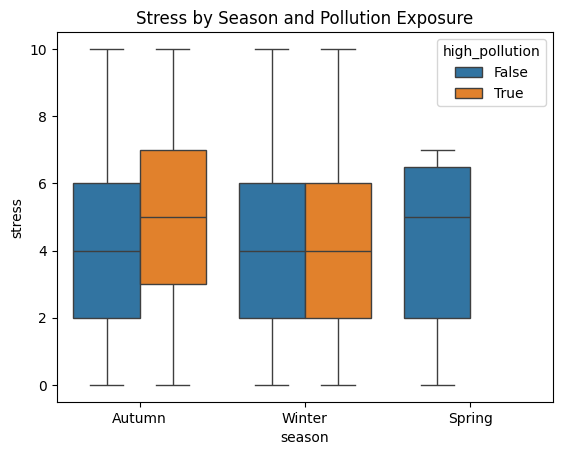

In [442]:
sns.boxplot(
    data=df,
    x='season',
    y='stress',
    hue='high_pollution'
)
plt.title("Stress by Season and Pollution Exposure")
plt.show()


The plot suggests that during Autumn, people exposed to higher air pollution tend to report higher stress levels compared to those with lower pollution exposure.

In Winter, the stress distributions for high and low pollution exposure appear very similar, indicating no clear difference in average stress levels.

For Spring, I think, the number of observations is limited, so no strong conclusions can be drawn for this season.

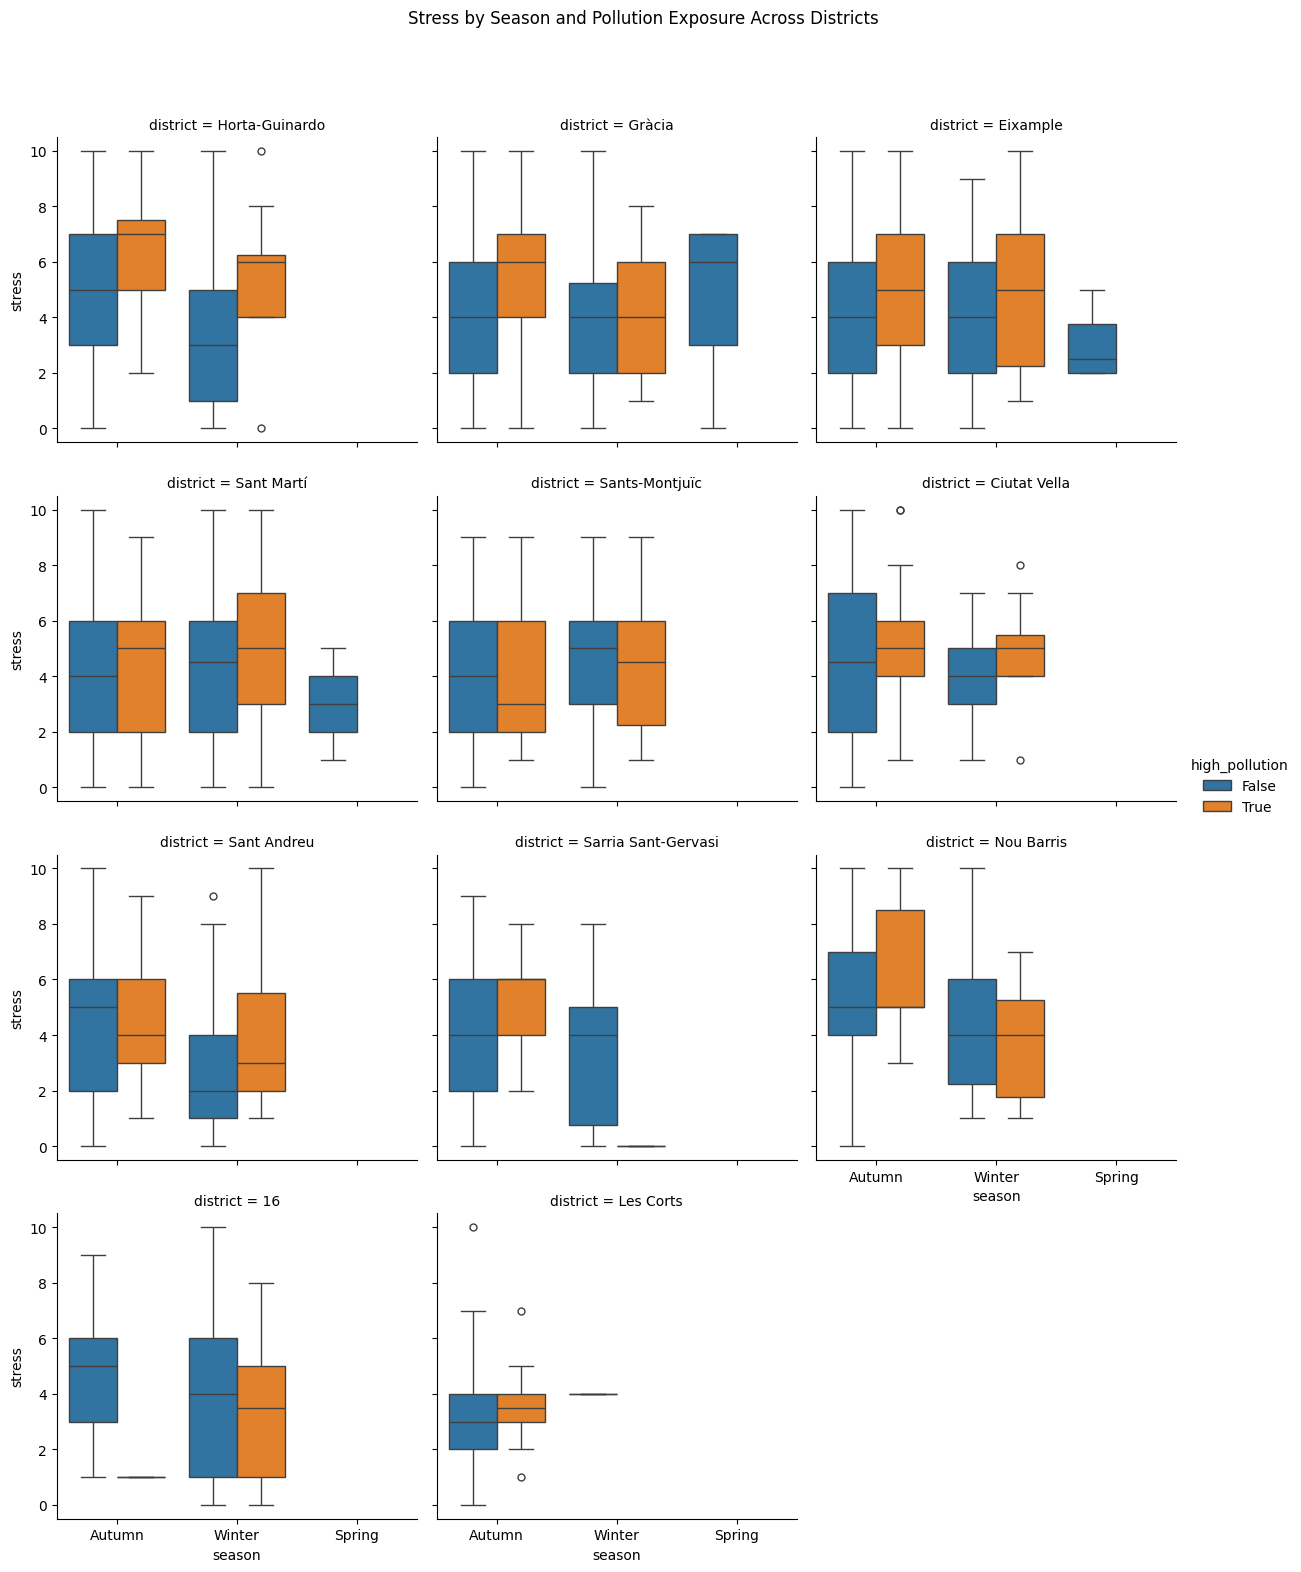

In [ ]:


sns.catplot(
    data=df,
    x='season',
    y='stress',
    hue='high_pollution',
    col='district',      # Create a separate plot for each district
    kind='box',
    col_wrap=3,      
    height=4,
    aspect=1
)

plt.subplots_adjust(top=0.9)
plt.suptitle("Stress by Season and Pollution Exposure Across Districts")
plt.show()


In several districts (e.g. Horta-Guinardó, Gràcia, Eixample, Nou Barris), higher pollution exposure in Autumn is generally associated with higher median stress levels, consistent with the overall seasonal trend observed earlier.

In Winter, stress levels under high and low pollution exposure tend to overlap strongly in most districts, suggesting that pollution exposure alone does not explain stress variation during this season.

Spring data is sparse across nearly all districts, limiting the ability to draw reliable conclusions for this season.